# AIPI 590 - XAI | Assignment #4
### Explainable Deep Learning
### Anish Parmar

Majority of the GradCam related code (imports, initialization, etc.) was pulled from here: https://jacobgil.github.io/pytorch-gradcam-book/introduction.html

The above source was provided by Professor Bent via the class discord.

One small code snippet related to transforming the images was produced with AI assistance. The citation is above the code snippet.


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/anishParmar9778/DukeXAI/blob/main/HW4/AIPI_590_explainable_deep_learning.ipynb)

In [ ]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "DukeXAI" # Change to your repo name
git_path = 'https://github.com/anishParmar9778/DukeXAI.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'HW4'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

# **Background Information**

**Recycling Sorting**

**Task:** Classify recyclable objects into classes

**Purpose:** Promotes sustainable waste management and environmental safety

**RealWaste Dataset** - https://www.kaggle.com/datasets/joebeachcapital/realwaste

This is an image classification dataset of waste items with 9 material types (Carboard, Plastic, Metal, Paper, Glass, Textile Trash, Vegetation, Food Organics, Misc Trash).

For the following assignment, 1 image from each of the following classes was used: Cardboard, Plastic, Metal, Paper, & Glass.

# **GradCam Code Implementation**

**Add necessary imports**

In [1]:
import torch
from torchvision.models import resnet50
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
model = resnet50(pretrained=True)
model.eval()
target_layers = [model.layer4[-1]]

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 117MB/s]


**Re-size images to 224x224 since ResNet50 expects images of such size. Original images from the dataset are 524x524.**

*This transform code snippet below was generated by GPT-5 on 10/4/2025 at 6:30 pm.*

In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

**Set dataset path and initialize array of class names**

In [4]:
dataset_path = "RealWaste"
classes = ["Cardboard", "Plastic", "Metal", "Paper", "Glass"]

**Install grad cam**

In [5]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 16.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=a441ab79265f9a885300459519c202629bbe95fa10b9481779992b1eb152a7e1
  Stored in directory: /root/.cache/pip/wheels/fb/3b/09/2afc520f3d69bc26ae6bd87416759c820a3f7d05c1a077bbf6
Successfully built grad-cam


**Import GradCam and 2 variants (GradCam++, EigenCam)**

In [6]:
from pytorch_grad_cam import GradCAM, GradCAMPlusPlus, EigenCAM
from pytorch_grad_cam.utils.image import show_cam_on_image

**Construct grad cam objects**

In [7]:
gradcam = GradCAM(model=model, target_layers=target_layers)
gradcam_pp = GradCAMPlusPlus(model=model, target_layers=target_layers)
eigencam = EigenCAM(model=model, target_layers=target_layers)

**Iterate through each material class and produce GradCam, GradCam++, EigenCAM**

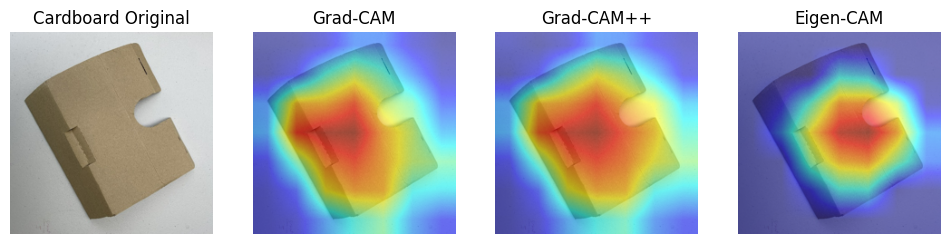

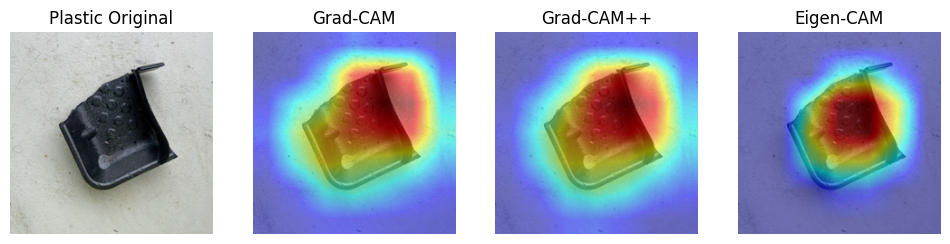

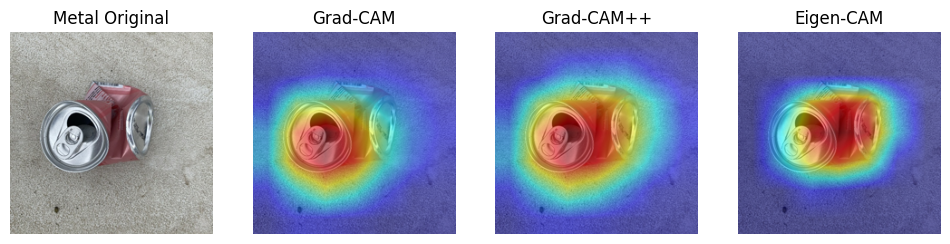

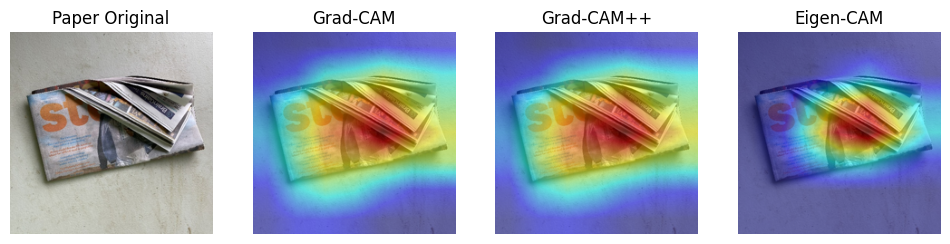

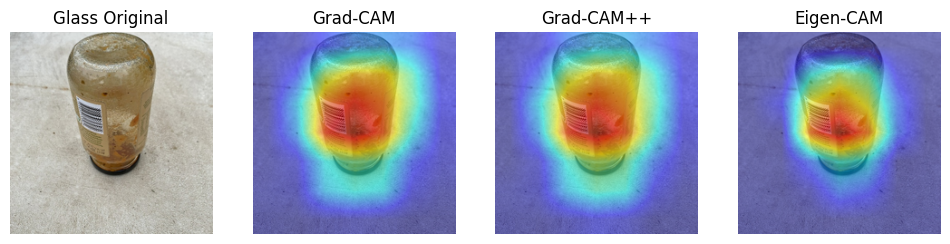

In [9]:
for single_class in classes:
    class_folder = os.path.join(dataset_path, single_class)
    image_files = [
        single_file for single_file in os.listdir(class_folder)
        if single_file.lower().endswith('.jpg')
    ]

    image_path = os.path.join(class_folder, image_files[0])
    image = Image.open(image_path).convert('RGB')
    rgb_image = np.array(image.resize((224,224))) / 255.0

    input_tensor = transform(image).unsqueeze(0)

    grayscale_cam = gradcam(input_tensor=input_tensor)[0, :]
    gradcam_visualization = show_cam_on_image(rgb_image, grayscale_cam, use_rgb=True)

    grayscale_cam_pp = gradcam_pp(input_tensor=input_tensor)[0, :]
    gradcam_pp_visualization = show_cam_on_image(rgb_image, grayscale_cam_pp, use_rgb=True)

    grayscale_eigen = eigencam(input_tensor=input_tensor)[0, :]
    eigencam_visualization = show_cam_on_image(rgb_image, grayscale_eigen, use_rgb=True)

    plt.figure(figsize=(12,4))
    plt.subplot(1,4,1)
    plt.imshow(rgb_image)
    plt.title(f"{single_class} Original")
    plt.axis('off')

    plt.subplot(1,4,2)
    plt.imshow(gradcam_visualization)
    plt.title("Grad-CAM")
    plt.axis('off')

    plt.subplot(1,4,3)
    plt.imshow(gradcam_pp_visualization)
    plt.title("Grad-CAM++")
    plt.axis('off')

    plt.subplot(1,4,4)
    plt.imshow(eigencam_visualization)
    plt.title("Eigen-CAM")
    plt.axis('off')

    plt.show()


# **Comparison & Reflection**

**Comparison**

By comparing the attention maps, we can see a clear progression in localization quality and object focus across the 3 GradCAM variants. GradCAM (the most basic method) seems to provide a general, diffused heatmap highlighting the broad region of the image containing the classified object. Even though it correctly identifies the object's base structure (paper and plastic images), its attention appears to frequently include parts of the surrounding background. This potentially suggests that the base GradCAM method has a less precise focus on the object's definitive boundaries.

GradCAM++ improves upon the base GradCAM method by utilizing a more complex weighted average of gradients. This seems to result in sharper and more intense hot spots on the most discriminative parts of the object. This can be best seen with the focus on the center of the glass jar. This method appears to be better at pinpointing specific features that drive the classification. However even GradCAM++ can still have some background attention (metal image) (like GradCAM earlier).

EigenCAM appears to offer the clearest visual explanation by applying Principal Component Analysis (PCA) to the feature maps. Across the 5 images tested, it generated the tightest attention maps. It included the background the least of the three methods across all the images. Based off of these 5 images, EigenCAM appears to be most effective method (out of the 3 variants tested) for clear image segmentation. It confirms that the model is attending to the object's base structure and key structural imprints without overly focusing on background elements.

**Visual Cues the Model Attends To**

Based on the heatmaps, it seems like the model primarily focuses on the overall shape and noticeable features of the objects themselves. For the cardboard, metal, and plastic images, the model seems to form a clear outline of each object's unique shape. For plastic in particular, the inner structure (textual pattern on the plastic surface) is a clear region of high attention (especially with EigenCAM). For the glass image, the highest attention is at the center of the jar. This may be due to a focus on the label or contents of the jar. The attention covers the entire outline of the paper, however there is a noticeable extra focus on the folded area of the surface (especially in EigenCAM). This suggests it may be trying to notice the appearance of stacked/folded papers.

**Surprising and/or Misleading Behavior**

In the plastic and metal images, GradCAM and GradCAM++ show the attention extending beyond the object's outline and covering the background (slightly less with GradCAM++ compared to GradCAM but still present). Their primary focus is correct but this excess background inclusion could be misleading if the background is somehow related to a specific class. EigenCAM appears to handle this issue the best and mostly adheres to the object's outline.

Across all 3 GradCAM methods, there is a high focus on the center of the glass jar image. This is interesting because this might suggest that the model is relying on a feature like the label instead of the material itself. If the model consistently used labels to identify glass, it could fail if images without labels were used or if a label was placed on a different material.

**Why Model Explainability is Important in Recycling Classification**

For stakeholders to use an automated recycling classification system, they need to be willing to trust it. CAMs help show why a model makes a decision. This helps stakeholders build that trust with models in this domain. If training data contains biases, it is important to understand whether or not the model is picking up on them. For example, if all aluminum cans are of a particular brand and all steel cans of another brand, the model may be basing its predictions on the color/logo of the brand instead of the material properties. CAMs can help identify whether a model is relying on such a bias. To improve photo quality of images used in model detection, understanding what features in materials the model relies on can be very useful (shape or texture).

# **Conclusion**

This analysis demonstrated the value of model explainability especially within sustainability related domains. Even if a model performs well, visualizing what it “notices” helps ensure that its reasoning is aligned with human understanding.Explainability not only builds trust with models but also guides improvements in both data quality and model robustness. It should be an essential component of responsible AI model deployment in real-world applications like automated recycling.